In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
#reading the .csv file as a dataframe (df)
bic=pd.read_csv('nyc-east-river-bicycle-counts.csv')

In [3]:
#outputing first 5 lines of df
bic.head(5)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


Text(0, 0.5, 'Number of bicycles')

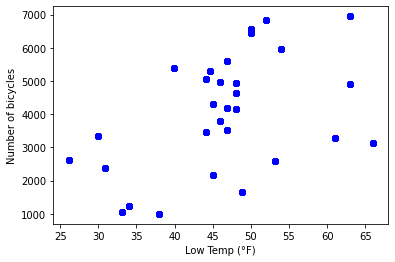

In [4]:
#plotting the dependence of the number of cyclists 
#who drove across the Manhattan bridge 
#on the minimum temperature during the day
import matplotlib.pyplot as plt
plt.plot(bic['Low Temp (°F)'], bic['Manhattan Bridge'], 'bo')
plt.xlabel('Low Temp (°F)')
plt.ylabel('Number of bicycles')
#the graph shows a positive linear correlation

### We want to build a line that most accurately reflects the revealed dependence

In [5]:
#building a list of minimum daytime temperatures 
#in order to then run the gradient descent algorithm on these values
X = np.asarray(bic['Low Temp (°F)'].tolist())

In [6]:
X[:5]

array([66. , 48.9, 34. , 33.1, 26.1])

In [7]:
#similarly X
Y = np.asarray(bic['Manhattan Bridge'].tolist())
Y[:5]

array([3126, 1646, 1232, 1067, 2617])

In [8]:
m = X.shape[0]
m

210

### Hypothesis:
### h(X) = a*X + b

In [9]:
#selecting the starting values 
#for the gradient descent algorithm - the coefficients of the line
a = (Y[1] - Y[0])/(X[1] - X[0])
a

86.54970760233917

In [10]:
b = Y[0] - a*X[0]
b

-2586.2807017543855

In [11]:
#The gradient descent function itself. 
#We start with the values of the coefficients a and b described above, 
#and gradually changing these values, we approach those 
#at which the loss function will be at a local minimum 
#(that is, our line will be the least different from the desired one).

def graddesc(X, Y, m, alpha, a, b):
    
    sumb_list = a*X + b - Y
    sumb = np.sum(sumb_list)
    suma_list = (a*X + b - Y)*X 
    suma = np.sum(suma_list)
    
    if abs((alpha/m)*suma)>0.05 or abs((alpha/m)*sumb)>0.05:
        a -= (alpha/m)*suma
        b -= (alpha/m)*sumb
        return graddesc(X, Y, m, alpha, a, b)
    
    else:
        return [a, b]

In [12]:
#getting the final coefficients of the line
coef = graddesc(X, Y, m, 0.00015, a, b)
print(coef)

[140.42979234193703, -2584.915851479138]


### What does this line look like:

In [13]:
#two points that will define our straight line
new_x = [X.min(), X.max()]

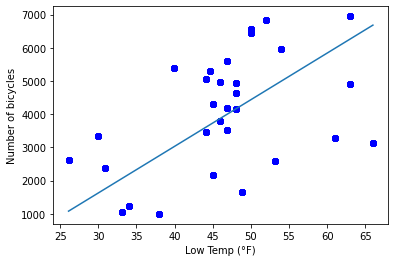

In [14]:
plt.plot(bic['Low Temp (°F)'], bic['Manhattan Bridge'], 'bo')
plt.xlabel('Low Temp (°F)')
plt.ylabel('Number of bicycles')
#adding a straight line to the same graph
plt.plot(new_x, [coef[0]*j + coef[1] for j in new_x])